In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import load_img
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np


In [6]:
img = load_img(r"c:\Users\USER\Desktop\Computer Vision\Testing\Happy\Screenshot 2023-09-06 212800.png")

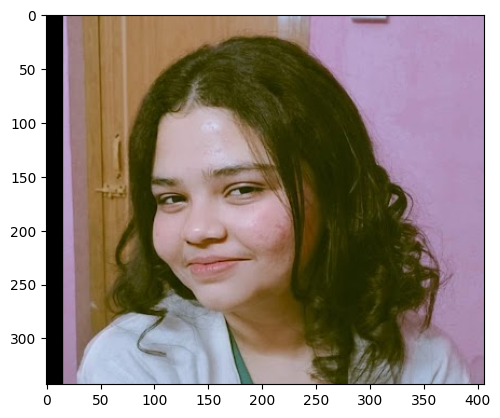

In [16]:
plt.imshow(img)

In [17]:
cv2.imread(r"c:\Users\USER\Desktop\Computer Vision\Training\Happy\Screenshot 2023-09-06 211958.png").shape

(270, 351, 3)

In [18]:
train = ImageDataGenerator(rescale= 1/249)
validation =ImageDataGenerator(rescale= 1/249)

In [19]:
train_dataset = train.flow_from_directory(r'c:\Users\USER\Desktop\Computer Vision\Training',
                                          target_size= (200,200),
                                          batch_size= 3,
                                          class_mode= 'binary')
validation_dataset = validation.flow_from_directory(r'c:\Users\USER\Desktop\Computer Vision\Validation',
                                                    target_size= (200,200),
                                                    batch_size= 3,
                                                    class_mode= 'binary')

Found 13 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'Happy': 0, 'Unhappy': 1}

In [21]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    # 
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ])

In [22]:
model.compile(loss= 'binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics= ['accuracy'])

In [23]:
history= model.fit(train_dataset,
                     steps_per_epoch= 3,
                     epochs= 10,
                     validation_data= validation_dataset
                    )

Epoch 1/10
3/3 [==============================] - 6s 1s/step - loss: 18.3398 - accuracy: 0.2857 - val_loss: 0.6231 - val_accuracy: 0.5385
Epoch 2/10
3/3 [==============================] - 2s 775ms/step - loss: 0.8215 - accuracy: 0.6667 - val_loss: 0.5679 - val_accuracy: 0.8462
Epoch 3/10
3/3 [==============================] - 2s 756ms/step - loss: 1.4358 - accuracy: 0.4286 - val_loss: 0.5378 - val_accuracy: 0.7692
Epoch 4/10
3/3 [==============================] - 2s 598ms/step - loss: 0.9963 - accuracy: 0.5714 - val_loss: 0.6236 - val_accuracy: 0.6154
Epoch 5/10
3/3 [==============================] - 2s 692ms/step - loss: 0.4977 - accuracy: 0.7143 - val_loss: 0.3870 - val_accuracy: 0.9231
Epoch 6/10
3/3 [==============================] - 2s 741ms/step - loss: 0.3997 - accuracy: 0.8889 - val_loss: 0.5429 - val_accuracy: 0.7692
Epoch 7/10
3/3 [==============================] - 2s 714ms/step - loss: 0.2189 - accuracy: 0.8889 - val_loss: 0.1761 - val_accuracy: 0.9231
Epoch 8/10
3/3 [======

In [24]:
model.save('Ontorjami_v1.keras')
